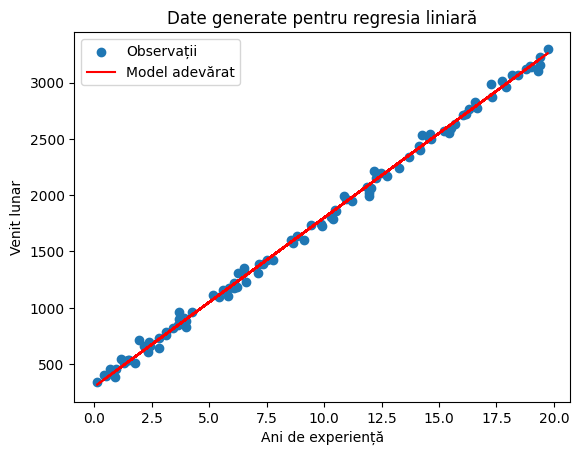

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x789a6b4b28c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x789a700827a0>
Traceback (most recent call last

Output()

Output()

AttributeError: module 'arviz' has no attribute 'from_pymc'

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

np.random.seed(42)

# a)
n = 100
a_true = 300
b_true = 150
sigma_true = 50

x = np.random.uniform(0, 20, n)
y = a_true + b_true * x + np.random.normal(0, sigma_true, n)

plt.scatter(x, y, label='Observații')
plt.plot(x, a_true + b_true * x, color='red', label='Model adevărat')
plt.xlabel('Ani de experiență')
plt.ylabel('Venit lunar')
plt.legend()
plt.title('Date generate pentru regresia liniară')
plt.show()

# b)
with pm.Model() as model:
    a = pm.Normal('a', mu=0, sigma=10)
    b = pm.Normal('b', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=10)

    y_obs = pm.Normal('y_obs', mu=a + b * x, sigma=sigma, observed=y)

    trace = pm.sample(2000, return_inferencedata=False)

idata = az.from_pymc(trace)

az.plot_trace(idata)
plt.show()

a_est = trace['a'].mean()
b_est = trace['b'].mean()
sigma_est = trace['sigma'].mean()

print(f"Estimatul pentru a: {a_est}")
print(f"Estimatul pentru b: {b_est}")
print(f"Estimatul pentru sigma: {sigma_est}")
